The goal of this notebook is to use our processed point_data, coarse-grain using a lucy coarse-graining function. We can then import this into tensorflow and learn a model represantation for our system 

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 


In [2]:
#generating grid over which the coarse-grained data will be valid
dx = 0.01
dz = 0.01

xx,zz = np.meshgrid(np.arange(0,0.45,dx),np.arange(0,0.45,dz))
nx = xx.shape[1]
nz = xx.shape[0]
xp = xx.reshape((nx*nz,1))
zp = zz.reshape((nx*nz,1))

Xp = np.concatenate((xp,zp),axis=1)

#generating python list of spatially coarse grained frames (note we will temporally coarse grain after this step):
filtered_u_list = []
filtered_v_list = []
filtered_rho_list = []

c = 0.05 #spatial coarse-graining parameter

image_numbers = np.arange(0,4000,1)

for image_number_orig in image_numbers:
    point_data = np.loadtxt('/home/bay22/github_repos/RIMSAR/data/03_processed/point_data/point_data_'+str(image_number_orig)+'.dat')
    #calibrating
    #12mm = 29.4 pixels
    #camera at 300 hz


    #density of borosilicate glass: 2.23 g/cm3
    #volume of 0.6cm radius glass sphere = 0.90 cm^3
    #mass = 0.002 kg
    mass = 0.002
    point_data *= 12/(29.4*1000)
    point_data[:,1] = 0.4-point_data[:,1]
    point_data[:,3:] *= 300
    #print(point_data)


    Xc = point_data[:,0:2]

    r = np.sqrt( (Xp[:,0:1] - Xc[:,0:1].transpose())**2 + (Xp[:,1:2] - Xc[:,1:2].transpose())**2 )/c
    #r = np.sqrt( (xx - Xc[0,0] )**2 + (zz - Xc[0,1])**2 )/c

    W = 5*( -3*r**4 + 8*r**3 - 6*r**2 + 1   )/(3.14159*c**2)

    #numerical stability parameter
    epsilon = 1e-4
    W[r>=1] = 0
    rho = np.sum(W,axis=1).reshape((nx,nz))*mass + epsilon
    u = mass*np.matmul(W,point_data[:,3:4]).reshape((nz,nx))/rho
    v = mass*np.matmul(W,point_data[:,4:5]).reshape((nz,nx))/rho

    filtered_rho_list.append(rho)
    filtered_u_list.append(u)
    filtered_v_list.append(v)


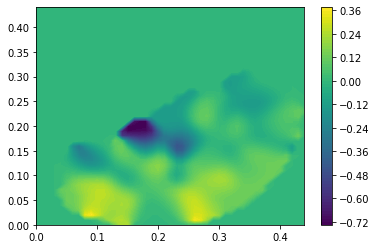

In [3]:
plt.contourf(xx,zz,u,levels=100)
plt.colorbar()